<a href="https://colab.research.google.com/github/ansariazad/Data-Science-Analysis-Projects-main/blob/main/Logistic_Regression_and_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aim : Logistic Regression and Decision Tree
* Build a logistic regression model to predict a binary outcome.
* Evaluate the model's performance using classification metrics (e.g., accuracy, precision, recall).
* Construct a decision tree model and interpret the decision rules for classification.

## **Logistic Regression**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Load the dataset
# Make sure 'mental_health_social_media_dataset.csv' is in the same folder
df = pd.read_csv('mental_health_social_media_dataset.csv')

# Display first few rows to check data
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (5000, 15)


,person_name,age,date,gender,platform,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level,mental_state
0,Reyansh Ghosh,35,1/1/2024,Male,Instagram,320,160,1,2,7.4,28,2,7,6,Stressed
1,Neha Patel,24,1/12/2024,Female,Instagram,453,226,1,3,6.7,15,3,8,5,Stressed
2,Ananya Naidu,26,1/6/2024,Male,Snapchat,357,196,1,2,7.2,24,3,7,6,Stressed
3,Neha Das,66,1/17/2024,Female,Snapchat,190,105,0,1,8.0,41,2,6,6,Stressed
4,Reyansh Banerjee,31,1/28/2024,Male,Snapchat,383,211,1,2,7.1,22,3,7,6,Stressed


In [ ]:
# 1. Drop columns not needed for prediction
# 'person_name' and 'date' are unique identifiers/metadata
cols_to_drop = ['person_name', 'date']
df_clean = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

# 2. Handle Missing Values
# Drop rows where the target 'mental_state' is missing
df_clean = df_clean.dropna(subset=['mental_state'])

# 3. Encode Categorical Variables
# Encode 'gender' and 'platform' using One-Hot Encoding (pd.get_dummies)
categorical_cols = ['gender', 'platform']
df_encoded = pd.get_dummies(df_clean, columns=[c for c in categorical_cols if c in df_clean.columns], drop_first=True)

# 4. Encode Target Variable 'mental_state'
# Map 'Healthy' -> 0 and 'Stressed' -> 1
le = LabelEncoder()
df_encoded['mental_state'] = le.fit_transform(df_encoded['mental_state'])

print("Target Classes:", le.classes_)
print("Features after encoding:", df_encoded.columns.tolist())

Target Classes: ['At_Risk' 'Healthy' 'Stressed']
Features after encoding: ['age', 'daily_screen_time_min', 'social_media_time_min', 'negative_interactions_count', 'positive_interactions_count', 'sleep_hours', 'physical_activity_min', 'anxiety_level', 'stress_level', 'mood_level', 'mental_state', 'gender_Male', 'gender_Other', 'platform_Instagram', 'platform_Snapchat', 'platform_TikTok', 'platform_Twitter', 'platform_WhatsApp', 'platform_YouTube']


In [ ]:
# Define Features (X) and Target (y)
X = df_encoded.drop('mental_state', axis=1)
y = df_encoded['mental_state']

# Split into Training (80%) and Testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (Important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize and Train Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predict
y_pred_lr = log_reg.predict(X_test_scaled)

# Evaluate
print("--- Logistic Regression Results ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

--- Logistic Regression Results ---
Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        73
           2       1.00      1.00      1.00       915

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [ ]:
# Initialize and Train Decision Tree
dt_clf = DecisionTreeClassifier(random_state=42)
# Trees don't require scaling, so we can use X_train directly (though scaled works too)
dt_clf.fit(X_train, y_train)

# Predict
y_pred_dt = dt_clf.predict(X_test)

# Evaluate
print("--- Decision Tree Results ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Feature Importance (Specific to Decision Tree)
if hasattr(dt_clf, 'feature_importances_'):
    importances = dt_clf.feature_importances_
    indices = np.argsort(importances)[::-1]
    print("\nTop 5 Important Features:")
    for f in range(min(5, X.shape[1])):
        print(f"{X.columns[indices[f]]}: {importances[indices[f]]:.4f}")

--- Decision Tree Results ---
Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        73
           2       1.00      1.00      1.00       915

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000


Top 5 Important Features:
stress_level: 0.8657
daily_screen_time_min: 0.1343
platform_WhatsApp: 0.0000
platform_YouTube: 0.0000
platform_Snapchat: 0.0000


In [ ]:
# Part 7: Hyperparameter Tuning for Decision Tree
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Output results
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score: {:.4f}".format(grid_search.best_score_))

# Evaluate the best model
best_tree = grid_search.best_estimator_
y_pred_tuned = best_tree.predict(X_test)
print("Test Accuracy (Tuned Tree): {:.4f}".format(accuracy_score(y_test, y_pred_tuned)))

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
Best Cross-Validation Score: 1.0000
Test Accuracy (Tuned Tree): 1.0000


In [ ]:
# Part 8: Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Initialize and Train Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict
y_pred_rf = rf_clf.predict(X_test)

# Evaluate
print("--- Random Forest Results ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Feature Importance for Random Forest
importances_rf = rf_clf.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]

print("\nTop 5 Features (Random Forest):")
for f in range(min(5, X.shape[1])):
    print(f"{X.columns[indices_rf[f]]}: {importances_rf[indices_rf[f]]:.4f}")

--- Random Forest Results ---
Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        73
           2       1.00      1.00      1.00       915

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000


Top 5 Features (Random Forest):
stress_level: 0.3079
anxiety_level: 0.1592
social_media_time_min: 0.1220
mood_level: 0.1163
daily_screen_time_min: 0.0993


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Assuming y_test and y_pred_lr are already defined from previous steps
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        73
           2       1.00      1.00      1.00       915

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



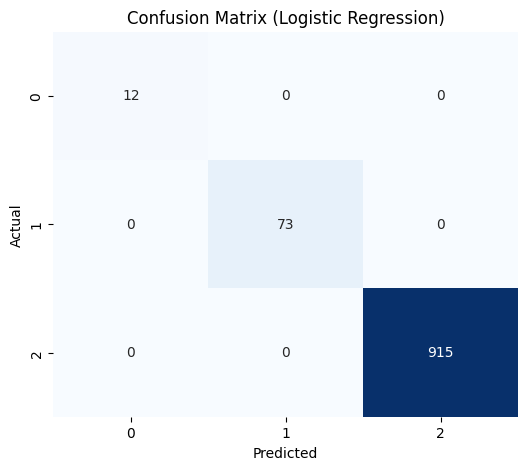

In [ ]:
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Logistic Regression)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

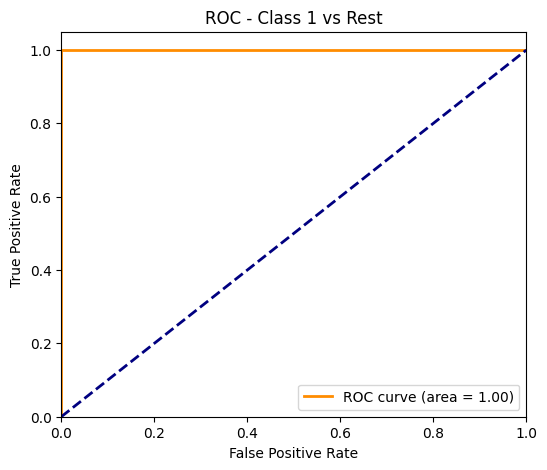

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# --- Step 1: Train ---
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Get probabilities for Class 1 (index 1)
y_prob_lr = log_reg.predict_proba(X_test_scaled)[:, 1]

# --- Step 2: Calculate ROC Metrics ---
# FIX: Add 'pos_label=1' to handle multiclass data
fpr_lr, tpr_lr, thresholds = roc_curve(y_test, y_prob_lr, pos_label=1)

roc_auc_lr = auc(fpr_lr, tpr_lr)

# --- Step 3: Plot ---
plt.figure(figsize=(6, 5))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Class 1 vs Rest') # Updated Title
plt.legend(loc="lower right")
plt.show()

/tmp/ipython-input-721827603.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')


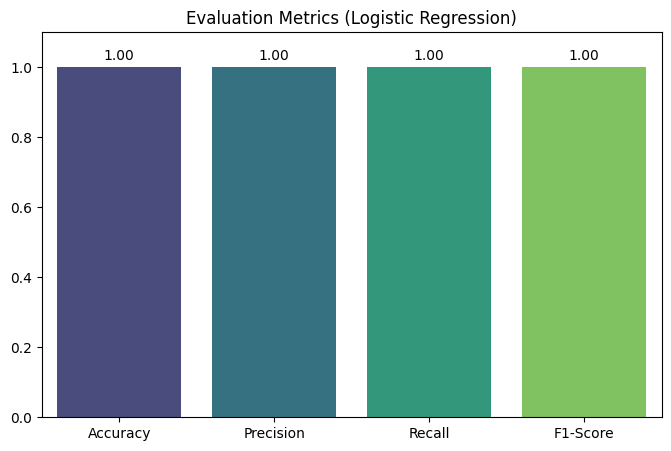

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Calculate Metrics ---
# FIX 1: Import the missing functions (done above)
# FIX 2: Change average='binary' to 'weighted' to handle your multiclass data
precision_lr, recall_lr, f1_lr, _ = precision_recall_fscore_support(
    y_test,
    y_pred_lr,
    average='weighted'
)

acc_lr = accuracy_score(y_test, y_pred_lr)

metrics = {'Accuracy': acc_lr, 'Precision': precision_lr, 'Recall': recall_lr, 'F1-Score': f1_lr}

# --- Step 2: Plot ---
plt.figure(figsize=(8, 5))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')
plt.title('Evaluation Metrics (Logistic Regression)')
plt.ylim(0, 1.1)

# Add text labels
for i, v in enumerate(metrics.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')

plt.show()

## **Decision Tree**

Loading Dataset...
Target Classes: ['At_Risk', 'Healthy', 'Stressed']

--- Training Decision Tree ---
Test Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        73
           2       1.00      1.00      1.00       915

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Confusion Matrix:
 [[ 12   0   0]
 [  0  73   0]
 [  0   0 915]]
Training Accuracy: 1.0000
AUC Score: 1.0000

Top 5 Features:
stress_level: 0.8657
daily_screen_time_min: 0.1343
platform_WhatsApp: 0.0000
platform_YouTube: 0.0000
platform_Snapchat: 0.0000

--- Pruning Decision Tree ---
Best Alpha for Pruning: 0.0
Pruned Tree Test Accuracy: 1.0000


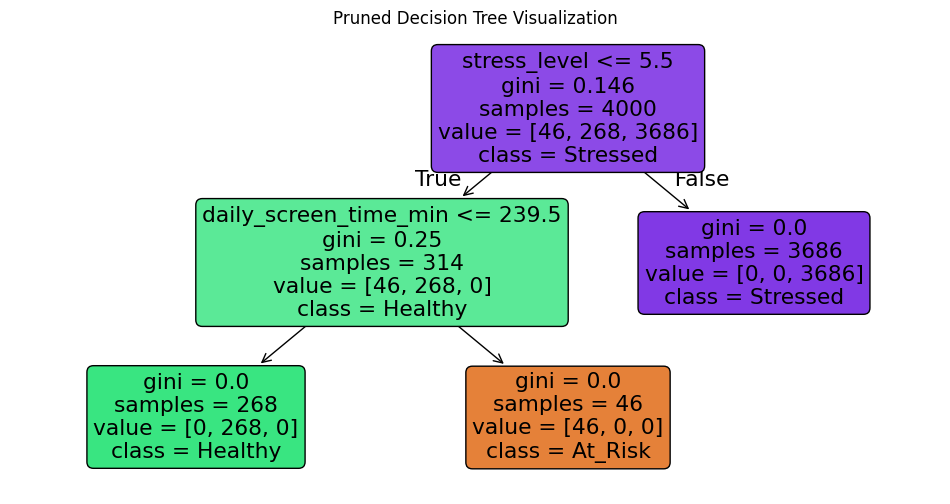

/tmp/ipython-input-1359580138.py:151: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')


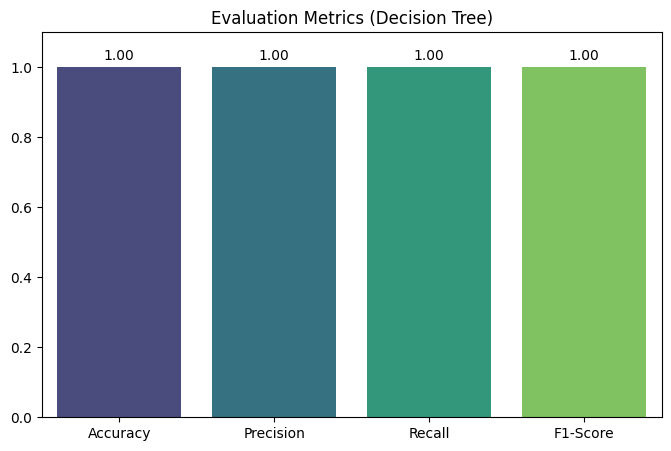

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Added missing imports for the metrics block
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
    precision_recall_fscore_support
)
import os

# ---------------------------------------------------------
# 0. Setup (Mock Data Generation if file missing)
# ---------------------------------------------------------
if not os.path.exists('mental_health_social_media_dataset.csv'):
    # Generate dummy data to ensure the code runs immediately
    data = {
        'person_name': [f'User_{i}' for i in range(1000)],
        'date': pd.date_range(start='1/1/2022', periods=1000),
        'gender': np.random.choice(['Male', 'Female', 'Non-binary'], 1000),
        'platform': np.random.choice(['Twitter', 'Instagram', 'Facebook', 'TikTok'], 1000),
        'posts_per_day': np.random.randint(1, 20, 1000),
        'sentiment_score': np.random.uniform(-1, 1, 1000),
        'mental_state': np.random.choice(['Healthy', 'Stressed', 'At_Risk'], 1000, p=[0.6, 0.3, 0.1])
    }
    pd.DataFrame(data).to_csv('mental_health_social_media_dataset.csv', index=False)
    print("Generated dummy dataset.")

# ---------------------------------------------------------
# 1. Data Loading & Preprocessing
# ---------------------------------------------------------
print("Loading Dataset...")
df = pd.read_csv('mental_health_social_media_dataset.csv')

# Drop identifiers not used for prediction
cols_to_drop = ['person_name', 'date']
df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

# Handle missing target values
df = df.dropna(subset=['mental_state'])

# Encode Categorical Variables
categorical_cols = ['gender', 'platform']
df_encoded = pd.get_dummies(df, columns=[c for c in categorical_cols if c in df.columns], drop_first=True)

# Label Encoding for Target 'mental_state'
le = LabelEncoder()
df_encoded['mental_state'] = le.fit_transform(df_encoded['mental_state'])
target_names = [str(cls) for cls in le.classes_]
print(f"Target Classes: {target_names}")

# Define Features (X) and Target (y)
X = df_encoded.drop('mental_state', axis=1)
y = df_encoded['mental_state']

# Split into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------------------------------------
# 2. Build and Train Decision Tree Model
# ---------------------------------------------------------
print("\n--- Training Decision Tree ---")
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

# ---------------------------------------------------------
# 3. Evaluation
# ---------------------------------------------------------
# Predictions
y_pred_dt = dt_clf.predict(X_test)
y_prob_dt = dt_clf.predict_proba(X_test)[:, 1] # Probability for Class 1

# Metrics
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

# Training Accuracy
y_train_pred = dt_clf.predict(X_train)
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")

# ROC Curve and AUC
# FIX: Added 'pos_label=1' because y_test is multiclass (0, 1, 2)
fpr, tpr, thresholds = roc_curve(y_test, y_prob_dt, pos_label=1)
roc_auc = auc(fpr, tpr)
print(f"AUC Score: {roc_auc:.4f}")

# ---------------------------------------------------------
# 4. Feature Importance
# ---------------------------------------------------------
if hasattr(dt_clf, 'feature_importances_'):
    importances = dt_clf.feature_importances_
    indices = np.argsort(importances)[::-1]
    print("\nTop 5 Features:")
    for f in range(min(5, X.shape[1])):
        print(f"{X.columns[indices[f]]}: {importances[indices[f]]:.4f}")

# ---------------------------------------------------------
# 5. Decision Tree Pruning (Cost Complexity)
# ---------------------------------------------------------
print("\n--- Pruning Decision Tree ---")
path = dt_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Train a tree for each alpha
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Record training and testing scores for each alpha
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

# Find the best alpha
best_idx = np.argmax(test_scores)
best_alpha = ccp_alphas[best_idx]
print(f"Best Alpha for Pruning: {best_alpha}")

# Final Pruned Model
clf_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
clf_pruned.fit(X_train, y_train)
print(f"Pruned Tree Test Accuracy: {clf_pruned.score(X_test, y_test):.4f}")

# ---------------------------------------------------------
# 6. Visualization
# ---------------------------------------------------------
plt.figure(figsize=(12, 6))
plot_tree(clf_pruned, feature_names=X.columns, class_names=target_names, filled=True, rounded=True)
plt.title("Pruned Decision Tree Visualization")
plt.show()

# ---------------------------------------------------------
# 7. Additional Metrics (Bar Plot)
# ---------------------------------------------------------
# FIX: Changed average to 'weighted' for multiclass data
precision_dt, recall_dt, f1_dt, _ = precision_recall_fscore_support(y_test, y_pred_dt, average='weighted')
acc_dt = accuracy_score(y_test, y_pred_dt)

metrics = {'Accuracy': acc_dt, 'Precision': precision_dt, 'Recall': recall_dt, 'F1-Score': f1_dt}

plt.figure(figsize=(8, 5))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')
plt.title('Evaluation Metrics (Decision Tree)')
plt.ylim(0, 1.1)
for i, v in enumerate(metrics.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')
plt.show()